In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

1. For the data set you have chosen and the binary categorical response variable that you had chosen
for Check-In 3 for a logistic regression or another binary variable in your data set, apply the KNN
algorithm or Random Forest Algorithm for classification.(The variable chosen does not have to be
directly related to the final goal of your project.)
2. Calculate the confusion matrix, prediction accuracy, prediction error, true positive rate, and true
negative rate, and F1 score on your training data set.
3. Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation
on the validation set to calculate the AUC and accuracy of each fold.
4. Include code and explanation for the steps above in your notebook.

In [3]:

# 1. For the data set you have chosen and the binary categorical response variable that you had chosen
# for Check-In 3 for a logistic regression or another binary variable in your data set, apply the KNN
# algorithm or Random Forest Algorithm for classification.(The variable chosen does not have to be
# directly related to the final goal of your project.)

df['mode'] = df['mode'].astype(int)
x = df.select_dtypes(include=['int64', 'float64']).drop(columns=['mode'])
y = df['mode']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a K-Nearest Neighbors model and fit it to the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

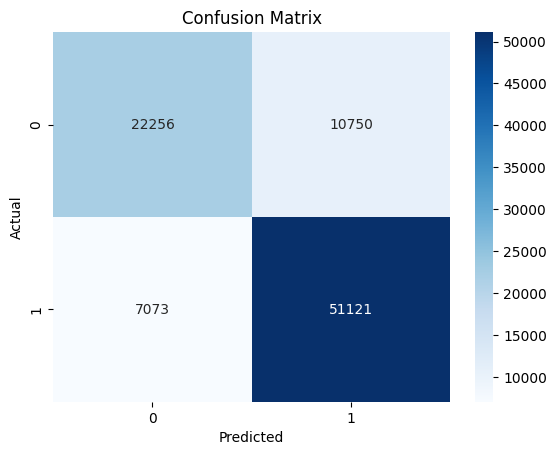

Prediction accuracy: 0.8045723684210526
Prediction error: 0.19542763157894738
True positive rate: 0.8784582603017493
True negative rate: 0.6743016421256741
F1 score: 0.8515554074876108


In [5]:
# 2. Calculate the confusion matrix, prediction accuracy, prediction error, true positive rate, and true
# negative rate, and F1 score on your training data set.

# calculate the confusion matrix
import seaborn as sns
y_train_pred = knn.predict(x_train)
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# calculate the prediction accuracy
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Prediction accuracy: {accuracy}')

# calculate the prediction error
error = 1 - accuracy
print(f'Prediction error: {error}')

# calculate the true positive rate
true_positive_rate = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
print(f'True positive rate: {true_positive_rate}')

# calculate the true negative rate
true_negative_rate = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print(f'True negative rate: {true_negative_rate}')

# calculate the F1 score
f1_score = metrics.f1_score(y_train, y_train_pred)
print(f'F1 score: {f1_score}')


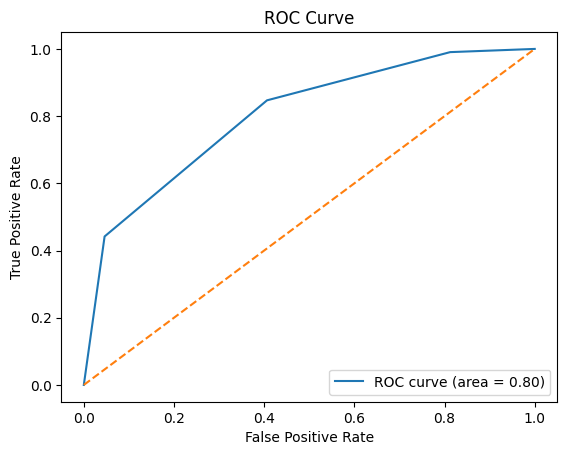

AUC of each fold: [0.57846442 0.57299061 0.57930166 0.57503366 0.5747605 ]
Accuracy of each fold: [0.6        0.59890351 0.59473684 0.59188596 0.60065789]


In [27]:
# 3. Calculate and plot the ROC curve and AUC on your validation data set. Use 5-fold cross-validation
# on the validation set to calculate the AUC and accuracy of each fold.

# calculate the ROC curve and AUC
y_test_pred_prob = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

# calculate the AUC and accuracy of each fold using 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)
aucs = cross_val_score(knn, x_test, y_test, cv=cv, scoring='roc_auc')
accuracies = cross_val_score(knn, x_test, y_test, cv=cv, scoring='accuracy')
print(f'AUC of each fold: {aucs}')
print(f'Accuracy of each fold: {accuracies}')